In [1]:
import time
from utils import display_plot, save_reward
from learner import train
from environment import MultiAgentGridEnv

In [2]:
gamma = 0.999
actor_lr = 0.0001
critic_lr = 0.001
entropy_weight = 0.01

In [3]:
key1 = 'total area weight'
key2 = 'overlap weight'
key3 = 'energy weight'
reward_weight_configs = [
    {key1: 5.0, key2: 1.0, key3: 1.0},
    {key1: 10.0, key2: 0.5, key3: 0.5},
    {key1: 3.0, key2: 2.0, key3: 2.0},
    {key1: 6.0, key2: 1.5, key3: 0.5},
    {key1: 4.0, key2: 1.0, key3: 3.0},
]

In [4]:
rewards_list = []
episodes_list = []
names = []

In [5]:
for index, reward_weight in enumerate(reward_weight_configs):
    _, rewards, episodes = train(max_episode=5000, actor_lr=actor_lr,
                                 critic_lr=critic_lr, gamma=gamma, entropy_weight=entropy_weight, reward_weight=reward_weight, path=f'rewardweight/config{index}')
    rewards_list.append(rewards)
    episodes_list.append(episodes)
    names.append(f'config{index}')

    save_reward(
        f'reward/rewardweight/config{index}/reward.txt', rewards=rewards)
    time.sleep(120)
    print('---------------------------------')

Episode 0 return: -49143.00
Episode 1000 return: 1489.00
Episode 2000 return: -135.00
Episode 3000 return: -1944.00
Episode 4000 return: 1474.00
---------------------------------
Episode 0 return: -29404.50
Episode 1000 return: 6048.00
Episode 2000 return: 4537.50
Episode 3000 return: 5255.50
Episode 4000 return: 6073.00
---------------------------------
Episode 0 return: -51630.00
Episode 1000 return: -13584.00
Episode 2000 return: -5550.00
Episode 3000 return: -3435.00
Episode 4000 return: -3451.00
---------------------------------
Episode 0 return: -39832.50
Episode 1000 return: -3399.00
Episode 2000 return: 405.00
Episode 3000 return: -838.50
Episode 4000 return: 1207.50
---------------------------------
Episode 0 return: -42577.00
Episode 1000 return: -5032.00
Episode 2000 return: -4686.00
Episode 3000 return: -2584.00
Episode 4000 return: -8906.00
---------------------------------


Plot saved


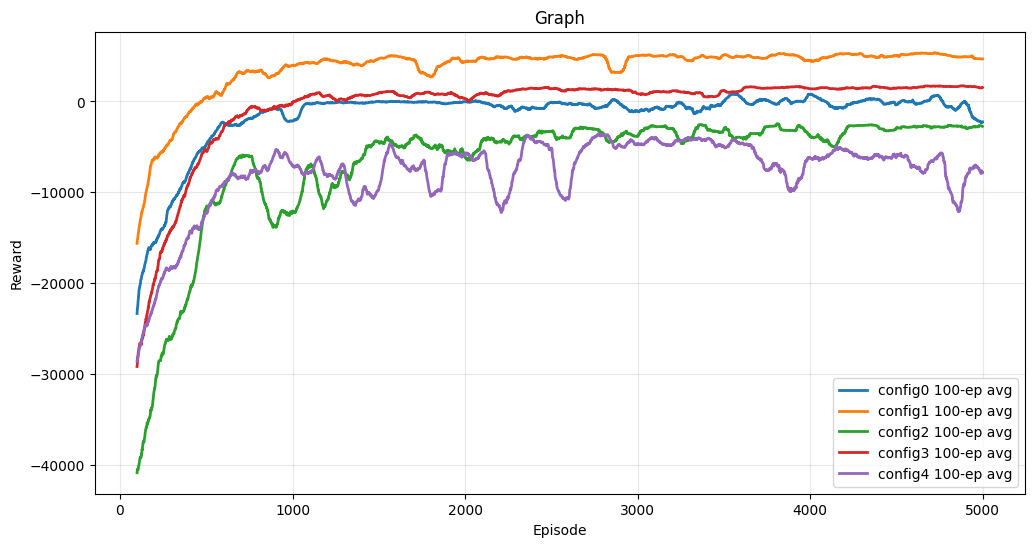

In [6]:
display_plot(rewards_list=rewards_list, episodes_list=episodes_list, names=names,
             plot_title='Graph', filename='reward_trend', save=True)

In [ ]:
configs = [
    (0.0001, 0.0001),  # Actor = Critic (Blue)
    (0.0001, 0.0003),  # Actor < Critic (Orange)
    (0.0001, 0.001),  # Actor < Critic (Purple)
]